The data comes from a longitudinal study of lung tomography measurements of different groups of patients.

Download at https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lung-volume.csv

For each group, is there a significant difference between time 1 and time 2?

Is there a significant difference in the mean of all groups at time 2?

In [90]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

In [60]:
lung_df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lung-volume.csv')
lung_df.info()
lung_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   group    400 non-null    int64 
 1   patient  400 non-null    object
 2   t1       400 non-null    int64 
 3   t2       400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


,group,patient,t1,t2
0,1,1-1,4226,4497
1,1,1-2,5731,5665
2,1,1-3,3912,4505
3,1,1-4,4811,6472
4,1,1-5,5128,4710


In [61]:
lung_df['group'].value_counts()

1    200
3    100
2    100
Name: group, dtype: int64

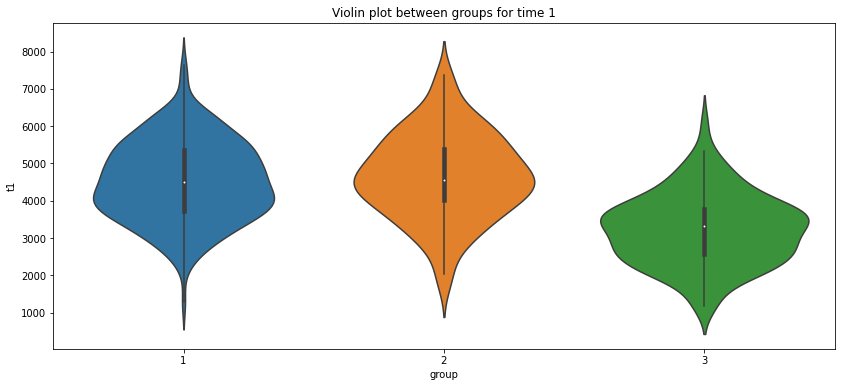

In [62]:
plt.figure(figsize=(14,6))
sns.violinplot(x="group", y="t1", data=lung_df)
plt.title('Violin plot between groups for time 1')
plt.show()

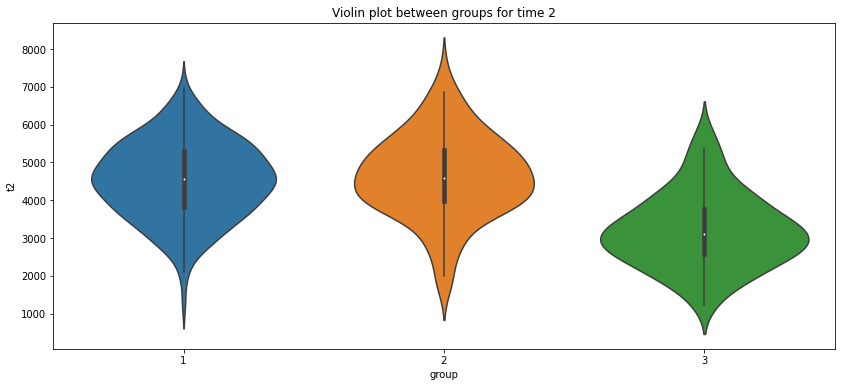

In [63]:
plt.figure(figsize=(14,6))
sns.violinplot(x="group", y="t2", data=lung_df)
plt.title('Violin plot between groups for time 2')
plt.show()

**For each group, is there a significant difference between time 1 and time 2?**

**Group 1**

In [64]:
group_1 = lung_df.loc[lung_df['group']==1]
group_1['t_diff'] = group_1['t2'] - group_1['t1']
group_1.info()
group_1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   group    200 non-null    int64 
 1   patient  200 non-null    object
 2   t1       200 non-null    int64 
 3   t2       200 non-null    int64 
 4   t_diff   200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.4+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,group,patient,t1,t2,t_diff
0,1,1-1,4226,4497,271
1,1,1-2,5731,5665,-66
2,1,1-3,3912,4505,593
3,1,1-4,4811,6472,1661
4,1,1-5,5128,4710,-418


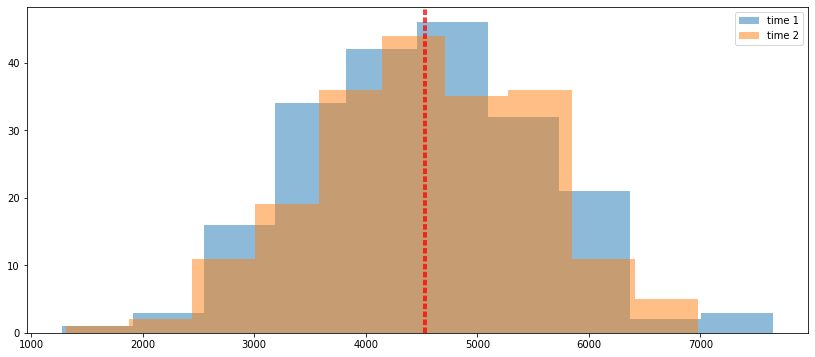

In [88]:
plt.figure(figsize=(14,6))
plt.hist(group_1['t1'], alpha = 0.5, label = 'time 1')
plt.hist(group_1['t2'], alpha = 0.5, label= 'time 2')
plt.axvline(group_1['t1'].mean(), c='r', ls='dashed')
plt.axvline(group_1['t2'].mean(), c='r', ls='dashed')
plt.legend()
plt.show()

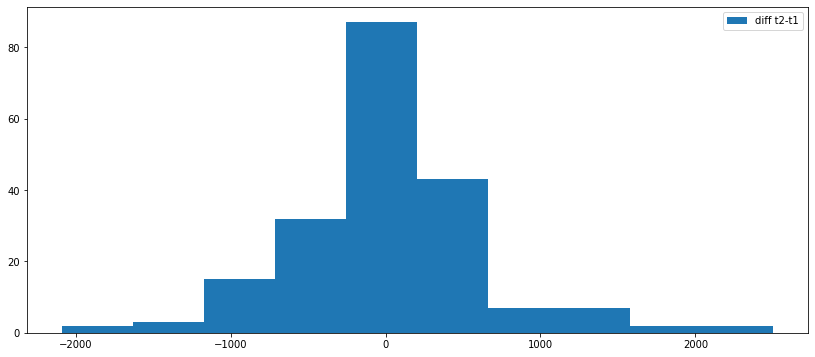

In [46]:
plt.figure(figsize=(14,6))
plt.hist(group_1['t_diff'], label = 'diff t2-t1')
plt.legend()
plt.show()

In [47]:
print(stats.describe(group_1['t_diff']))
print(stats.shapiro(group_1['t_diff']))

DescribeResult(nobs=200, minmax=(-2087, 2498), mean=14.07, variance=390848.356884422, skewness=0.5059669289277815, kurtosis=2.6330469885600785)
(0.9512620568275452, 2.5016638574015815e-06)


In [72]:
stats.ttest_rel(group_1['t1'], group_1['t2'])

Ttest_relResult(statistic=-0.31827677584963787, pvalue=0.7506087664956842)

The normality check for group 1's times is calculated with the differences between t2 and t1. Visually the difference doesn't not look normal and we can see from the statistical analysis that the kurtosis is quite large at 2.63. Furthermore, the shapiro test fails to prove that the difference is normal with a p_value much smaller than 0.05. Therefore, we should not perform a paired t-test for group 1. 

Even if we did assume normality, the relative t-test for group 1's t1 and t2 fields failed to reject the null with a p_value of 0.75, meaning that the mean difference between t1 and t2 in group 1 is equal to zero.

**Group 2**

In [48]:
group_2 = lung_df[lung_df['group']==2]
group_2['t_diff'] = group_2['t2'] - group_2['t1']
group_2.info()
group_2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 200 to 299
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   group    100 non-null    int64 
 1   patient  100 non-null    object
 2   t1       100 non-null    int64 
 3   t2       100 non-null    int64 
 4   t_diff   100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.7+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,group,patient,t1,t2,t_diff
200,2,2-1,7372,7430,58
201,2,2-2,4580,4860,280
202,2,2-3,4389,3806,-583
203,2,2-4,4785,5537,752
204,2,2-5,5315,4011,-1304


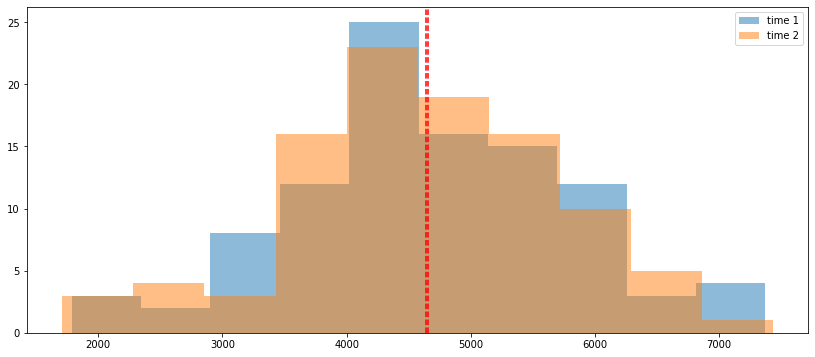

In [87]:
plt.figure(figsize=(14,6))
plt.hist(group_2['t1'], alpha = 0.5, label = 'time 1')
plt.hist(group_2['t2'], alpha = 0.5, label= 'time 2')
plt.axvline(group_2['t1'].mean(), c='r', ls='dashed')
plt.axvline(group_2['t2'].mean(), c='r', ls='dashed')
plt.legend()
plt.show()

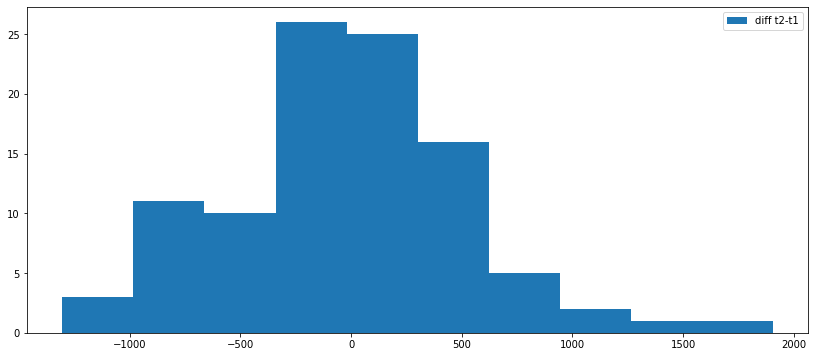

In [66]:
plt.figure(figsize=(14,6))
plt.hist(group_2['t_diff'], label = 'diff t2-t1')
plt.legend()
plt.show()

In [68]:
print(stats.describe(group_2['t_diff']))
print(stats.shapiro(group_2['t_diff']))

DescribeResult(nobs=100, minmax=(-1304, 1905), mean=-18.0, variance=302161.0707070707, skewness=0.3237019462539288, kurtosis=1.0006404124552226)
(0.9814630746841431, 0.17255757749080658)


In [71]:
stats.ttest_rel(group_2['t1'], group_2['t2'])

Ttest_relResult(statistic=0.32745622415118286, pvalue=0.7440142766032991)

The difference in group 2 appears to be more normal, as the kurtosis is smaller (1.0) and the distribution passes the shapiro normality test with a p_value of 0.17 > 0.05. However, the relative t-test fails to reject the null as the p_value is 0.744 > 0.05. Therefore, the mean difference between t1 and t2 for group 2 is equal to zero.

**Group 3**

In [73]:
group_3 = lung_df[lung_df['group']==3]
group_3['t_diff'] = group_3['t2'] - group_3['t1']
group_3.info()
group_3.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 300 to 399
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   group    100 non-null    int64 
 1   patient  100 non-null    object
 2   t1       100 non-null    int64 
 3   t2       100 non-null    int64 
 4   t_diff   100 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 4.7+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,group,patient,t1,t2,t_diff
300,3,3-1,3997,3895,-102
301,3,3-2,3765,3890,125
302,3,3-3,1921,2146,225
303,3,3-4,2742,2669,-73
304,3,3-5,3052,4135,1083


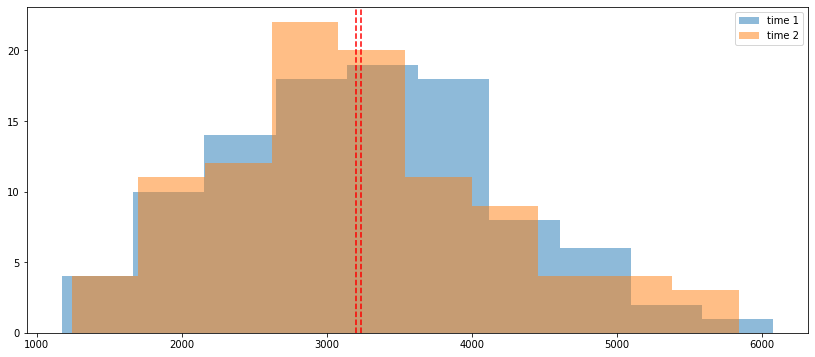

In [89]:
plt.figure(figsize=(14,6))
plt.hist(group_3['t1'], alpha = 0.5, label = 'time 1')
plt.hist(group_3['t2'], alpha = 0.5, label= 'time 2')
plt.axvline(group_3['t1'].mean(), c='r', ls='dashed')
plt.axvline(group_3['t2'].mean(), c='r', ls='dashed')
plt.legend()
plt.show()

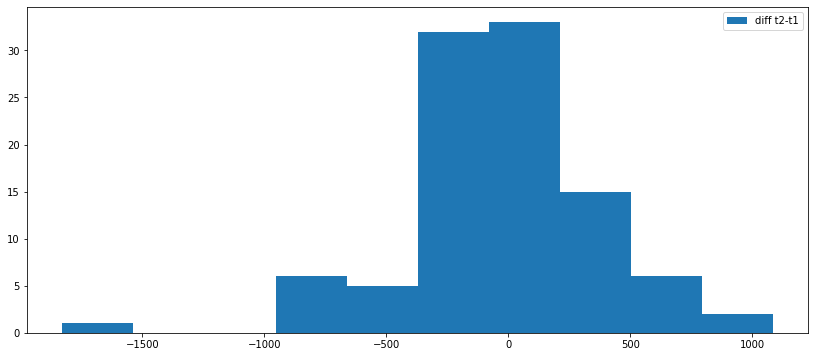

In [75]:
plt.figure(figsize=(14,6))
plt.hist(group_3['t_diff'], label = 'diff t2-t1')
plt.legend()
plt.show()

In [76]:
print(stats.describe(group_3['t_diff']))
print(stats.shapiro(group_3['t_diff']))

DescribeResult(nobs=100, minmax=(-1827, 1083), mean=-36.71, variance=166937.74333333332, skewness=-0.6776063369926263, kurtosis=3.355434798893132)
(0.9373377561569214, 0.00013314159878063947)


In [77]:
stats.ttest_rel(group_3['t1'], group_3['t2'])

Ttest_relResult(statistic=0.8984773127301627, pvalue=0.37111115842334486)

Like group 1, group 3 fails to pass the normality checks. Visually the difference between t2 and t1 does not look normal for group 3, and this is verified with a large kurtosis of 3.355 and a shapiro test of 0.0001 < 0.05.

Even if we were to take the relative t-test, it would fail to reject the null that the mean difference between t2 and t1 for group is not zero. 

**Is there a significant difference in the mean of all groups at time 2?**

In [83]:
print('Shapiro normality check for each group:')
print('Group 1 at t2: {}'.format(stats.shapiro(group_1['t2'])))
print('Group 2 at t2: {}'.format(stats.shapiro(group_2['t2'])))
print('Group 3 at t2: {}'.format(stats.shapiro(group_3['t2'])))

Shapiro normality check for each group:
Group 1 at t2: (0.9955824613571167, 0.8313238024711609)
Group 2 at t2: (0.9911357164382935, 0.7556766271591187)
Group 3 at t2: (0.9781965613365173, 0.09609080106019974)


In [84]:
print('Variance check for each group:')
print('Group 1 at t2: {}'.format(group_1['t2'].var()))
print('Group 2 at t2: {}'.format(group_2['t2'].var()))
print('Group 3 at t2: {}'.format(group_3['t2'].var()))

Variance check for each group:
Group 1 at t2: 1019194.8482160798
Group 2 at t2: 1216112.5252525255
Group 3 at t2: 957587.443535354


In [27]:
stats.f_oneway(group_1['t2'], group_2['t2'], group_3['t2'])

F_onewayResult(statistic=67.65846945026495, pvalue=5.1893599904179e-26)

The p_value for the f_oneway test is less than 0.05, therefore at least one of the groups is statistically different from the other group. So, we should procede with a Tukey's HSD test to determine which groups are different.

In [91]:
tukey = pairwise_tukeyhsd(endog= lung_df['t2'],
                          groups = lung_df['group'],
                          alpha=0.05)

tukey.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
1,2,99.705,0.6902,-195.9612,395.3712,False
1,3,-1341.865,0.001,-1637.5312,-1046.1988,True
2,3,-1441.57,0.001,-1782.9759,-1100.1641,True


We can see from the Tukey test that group 3 is statistically different from both group 1 and group 2 with a p_value of 0.001 for both. Therefore we can reject the null that group 3 is statistically the same as group 1 and 2 and on average group 3 is 1341.8 (s?) and 1441.57 (s?) less than group 1 and group 2 respectively. 